# 영화 줄거리 감성분석

In [18]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('./movie.csv')
df['내용'] = df['제목'] + " " + df['줄거리']
df

,제목,평점,감독,배우,개봉일자,줄거리,내용
0,범죄도시3,7.6,이상용,마동석 이준혁 아오키 무네타카 이범수 김민재 이지훈 김도건 고규필 전석호 안세호,2023.05.31.,대체불가 괴물형사 마석도 서울 광수대로 발탁! 베트남 납치 살해범 검거 후 7년 뒤...,범죄도시3 대체불가 괴물형사 마석도 서울 광수대로 발탁! 베트남 납치 살해범 검거 ...
1,엘리멘탈(패키지: 자막판+더빙판+부가영상+코멘터리),9.4,피터 손,레아 루이스 마무두 아티,2023.06.14.,불 물 공기 흙 4개의 원소들이 살고 있는 ‘엘리멘트 시티’ 재치 있고 불처럼 열정...,엘리멘탈(패키지: 자막판+더빙판+부가영상+코멘터리) 불 물 공기 흙 4개의 원소들이...
2,공조2: 인터내셔날,8.3,이석훈,현빈 유해진 윤아 다니엘 헤니 진선규 장영남 박훈 임성재 윤상화 박민하,2022.09.07.,공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위해 ...,공조2: 인터내셔날 공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄...
3,아바타: 물의 길(부가영상 제공),8.6,제임스 카메론,조 샐다나 샘 워싱턴 시고니 위버 우나 채플린 지오바니 리비시 스티븐 랭 케이트 ...,2022.12.14.,<아바타: 물의 길>은 판도라 행성에서 '제이크 설리'와 '네이티리'가 이룬 가족이...,아바타: 물의 길(부가영상 제공) <아바타: 물의 길>은 판도라 행성에서 '제이크 ...
4,올빼미,9.3,안태진,류준열 유해진 최무성 조성하 박명훈 김성철 안은진 조윤서 이주원 김예은,2022.11.23.,맹인이지만 뛰어난 침술 실력을 지닌 ‘경수’는어의 ‘이형익’에게 그 재주를 인정받아...,올빼미 맹인이지만 뛰어난 침술 실력을 지닌 ‘경수’는어의 ‘이형익’에게 그 재주를 ...
...,...,...,...,...,...,...,...
5191,트론: 새로운 시작,7.3,조셉 코신스키,제프 브리지스 가렛 헤드룬드 올리비아 와일드 마이클 쉰 애니스 처파 브루스 박스라...,2010.12.29.,세상 누구도 본적 없는 최고의 가상 현실을 창조한 천재박사 케빈 플린(제프 브리지스...,트론: 새로운 시작 세상 누구도 본적 없는 최고의 가상 현실을 창조한 천재박사 케빈...
5192,리버티 벨런스를 쏜 사나이,8.4,존 포드,존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 켄 ...,주연 존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 ...,랜스(제임스 스튜어트 분)는 자신의 오래전 친구 톰(존 웨인 분)의 장례식에 참석하...,리버티 벨런스를 쏜 사나이 랜스(제임스 스튜어트 분)는 자신의 오래전 친구 톰(존 ...
5193,리썰 웨폰,8.3,리차드 도너,멜 깁슨 대니 글로버 게리 부시 미치 라이언 톰 앳킨스 달린 러브,1987.12.01.,술집 여종업원인 아멘다 훤세커(Amanda Hunsaker: 잭키 스완슨 분)가 약...,리썰 웨폰 술집 여종업원인 아멘다 훤세커(Amanda Hunsaker: 잭키 스완슨...
5194,몽골리안 프린세스,7.5,정단우,정단우 엘리자베스 가르시아 박하나,2015.03.19.,34살이 되도록 연애 한번 못해보고 영화밖에 모르고 살아온 ‘단우’. 어느 날 본인...,몽골리안 프린세스 34살이 되도록 연애 한번 못해보고 영화밖에 모르고 살아온 ‘단우...


In [20]:
knu=pd.read_csv('../PYHTON/data/knu_sentiment_lexicon.csv')
knu

,word,polarity
0,ㅡㅡ,-1
1,ㅠㅠ,-1
2,ㅠ_ㅠ,-1
3,ㅠ,-1
4,ㅜㅡ,-1
...,...,...
14849,(^-^),1
14850,(;_;),-1
14851,(-_-),-1
14852,(-;,1


In [21]:
okt = Okt()
senti = pd.read_csv("../PYHTON/data/knu_sentiment_lexicon.csv") # 감성사전
total_score = []


for i in tqdm(df['내용']):
    t = okt.normalize(str(i))
    score = 0
    
    for w, p in zip(senti['word'], senti['polarity']):
        score += t.count(w) * p 
    total_score.append(score)

df['감성점수'] = total_score
df

100%|██████████████████████████████████████████████████████████████████████████████| 5196/5196 [02:56<00:00, 29.45it/s]


,제목,평점,감독,배우,개봉일자,줄거리,내용,감성점수
0,범죄도시3,7.6,이상용,마동석 이준혁 아오키 무네타카 이범수 김민재 이지훈 김도건 고규필 전석호 안세호,2023.05.31.,대체불가 괴물형사 마석도 서울 광수대로 발탁! 베트남 납치 살해범 검거 후 7년 뒤...,범죄도시3 대체불가 괴물형사 마석도 서울 광수대로 발탁! 베트남 납치 살해범 검거 ...,-14
1,엘리멘탈(패키지: 자막판+더빙판+부가영상+코멘터리),9.4,피터 손,레아 루이스 마무두 아티,2023.06.14.,불 물 공기 흙 4개의 원소들이 살고 있는 ‘엘리멘트 시티’ 재치 있고 불처럼 열정...,엘리멘탈(패키지: 자막판+더빙판+부가영상+코멘터리) 불 물 공기 흙 4개의 원소들이...,9
2,공조2: 인터내셔날,8.3,이석훈,현빈 유해진 윤아 다니엘 헤니 진선규 장영남 박훈 임성재 윤상화 박민하,2022.09.07.,공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위해 ...,공조2: 인터내셔날 공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄...,-19
3,아바타: 물의 길(부가영상 제공),8.6,제임스 카메론,조 샐다나 샘 워싱턴 시고니 위버 우나 채플린 지오바니 리비시 스티븐 랭 케이트 ...,2022.12.14.,<아바타: 물의 길>은 판도라 행성에서 '제이크 설리'와 '네이티리'가 이룬 가족이...,아바타: 물의 길(부가영상 제공) <아바타: 물의 길>은 판도라 행성에서 '제이크 ...,-5
4,올빼미,9.3,안태진,류준열 유해진 최무성 조성하 박명훈 김성철 안은진 조윤서 이주원 김예은,2022.11.23.,맹인이지만 뛰어난 침술 실력을 지닌 ‘경수’는어의 ‘이형익’에게 그 재주를 인정받아...,올빼미 맹인이지만 뛰어난 침술 실력을 지닌 ‘경수’는어의 ‘이형익’에게 그 재주를 ...,-12
...,...,...,...,...,...,...,...,...
5191,트론: 새로운 시작,7.3,조셉 코신스키,제프 브리지스 가렛 헤드룬드 올리비아 와일드 마이클 쉰 애니스 처파 브루스 박스라...,2010.12.29.,세상 누구도 본적 없는 최고의 가상 현실을 창조한 천재박사 케빈 플린(제프 브리지스...,트론: 새로운 시작 세상 누구도 본적 없는 최고의 가상 현실을 창조한 천재박사 케빈...,9
5192,리버티 벨런스를 쏜 사나이,8.4,존 포드,존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 켄 ...,주연 존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 ...,랜스(제임스 스튜어트 분)는 자신의 오래전 친구 톰(존 웨인 분)의 장례식에 참석하...,리버티 벨런스를 쏜 사나이 랜스(제임스 스튜어트 분)는 자신의 오래전 친구 톰(존 ...,-8
5193,리썰 웨폰,8.3,리차드 도너,멜 깁슨 대니 글로버 게리 부시 미치 라이언 톰 앳킨스 달린 러브,1987.12.01.,술집 여종업원인 아멘다 훤세커(Amanda Hunsaker: 잭키 스완슨 분)가 약...,리썰 웨폰 술집 여종업원인 아멘다 훤세커(Amanda Hunsaker: 잭키 스완슨...,-24
5194,몽골리안 프린세스,7.5,정단우,정단우 엘리자베스 가르시아 박하나,2015.03.19.,34살이 되도록 연애 한번 못해보고 영화밖에 모르고 살아온 ‘단우’. 어느 날 본인...,몽골리안 프린세스 34살이 되도록 연애 한번 못해보고 영화밖에 모르고 살아온 ‘단우...,-8


In [22]:
senti_score=[]
for score in df['감성점수']:
    if score>0 : senti_score.append('긍정')
    elif score<0 : senti_score.append('부정')
    else : senti_score.append('중립')

In [23]:
df['감성분석결과']=senti_score
df

,제목,평점,감독,배우,개봉일자,줄거리,내용,감성점수,감성분석결과
0,범죄도시3,7.6,이상용,마동석 이준혁 아오키 무네타카 이범수 김민재 이지훈 김도건 고규필 전석호 안세호,2023.05.31.,대체불가 괴물형사 마석도 서울 광수대로 발탁! 베트남 납치 살해범 검거 후 7년 뒤...,범죄도시3 대체불가 괴물형사 마석도 서울 광수대로 발탁! 베트남 납치 살해범 검거 ...,-14,부정
1,엘리멘탈(패키지: 자막판+더빙판+부가영상+코멘터리),9.4,피터 손,레아 루이스 마무두 아티,2023.06.14.,불 물 공기 흙 4개의 원소들이 살고 있는 ‘엘리멘트 시티’ 재치 있고 불처럼 열정...,엘리멘탈(패키지: 자막판+더빙판+부가영상+코멘터리) 불 물 공기 흙 4개의 원소들이...,9,긍정
2,공조2: 인터내셔날,8.3,이석훈,현빈 유해진 윤아 다니엘 헤니 진선규 장영남 박훈 임성재 윤상화 박민하,2022.09.07.,공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위해 ...,공조2: 인터내셔날 공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄...,-19,부정
3,아바타: 물의 길(부가영상 제공),8.6,제임스 카메론,조 샐다나 샘 워싱턴 시고니 위버 우나 채플린 지오바니 리비시 스티븐 랭 케이트 ...,2022.12.14.,<아바타: 물의 길>은 판도라 행성에서 '제이크 설리'와 '네이티리'가 이룬 가족이...,아바타: 물의 길(부가영상 제공) <아바타: 물의 길>은 판도라 행성에서 '제이크 ...,-5,부정
4,올빼미,9.3,안태진,류준열 유해진 최무성 조성하 박명훈 김성철 안은진 조윤서 이주원 김예은,2022.11.23.,맹인이지만 뛰어난 침술 실력을 지닌 ‘경수’는어의 ‘이형익’에게 그 재주를 인정받아...,올빼미 맹인이지만 뛰어난 침술 실력을 지닌 ‘경수’는어의 ‘이형익’에게 그 재주를 ...,-12,부정
...,...,...,...,...,...,...,...,...,...
5191,트론: 새로운 시작,7.3,조셉 코신스키,제프 브리지스 가렛 헤드룬드 올리비아 와일드 마이클 쉰 애니스 처파 브루스 박스라...,2010.12.29.,세상 누구도 본적 없는 최고의 가상 현실을 창조한 천재박사 케빈 플린(제프 브리지스...,트론: 새로운 시작 세상 누구도 본적 없는 최고의 가상 현실을 창조한 천재박사 케빈...,9,긍정
5192,리버티 벨런스를 쏜 사나이,8.4,존 포드,존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 켄 ...,주연 존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 ...,랜스(제임스 스튜어트 분)는 자신의 오래전 친구 톰(존 웨인 분)의 장례식에 참석하...,리버티 벨런스를 쏜 사나이 랜스(제임스 스튜어트 분)는 자신의 오래전 친구 톰(존 ...,-8,부정
5193,리썰 웨폰,8.3,리차드 도너,멜 깁슨 대니 글로버 게리 부시 미치 라이언 톰 앳킨스 달린 러브,1987.12.01.,술집 여종업원인 아멘다 훤세커(Amanda Hunsaker: 잭키 스완슨 분)가 약...,리썰 웨폰 술집 여종업원인 아멘다 훤세커(Amanda Hunsaker: 잭키 스완슨...,-24,부정
5194,몽골리안 프린세스,7.5,정단우,정단우 엘리자베스 가르시아 박하나,2015.03.19.,34살이 되도록 연애 한번 못해보고 영화밖에 모르고 살아온 ‘단우’. 어느 날 본인...,몽골리안 프린세스 34살이 되도록 연애 한번 못해보고 영화밖에 모르고 살아온 ‘단우...,-8,부정


<Axes: xlabel='감성분석결과', ylabel='count'>

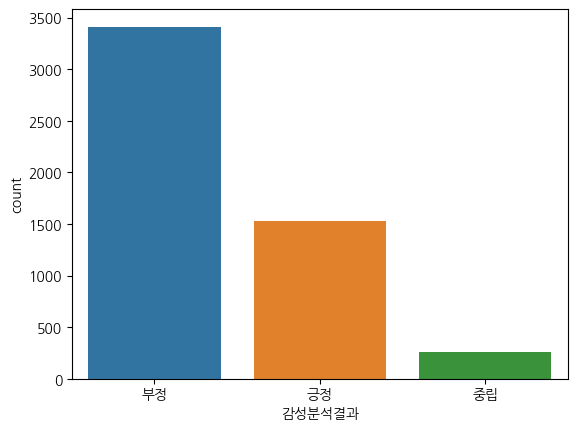

In [27]:
import seaborn as sns
import koreanize_matplotlib

sns.countplot(data=df, x='감성분석결과')

In [29]:
df.drop(index=1298, inplace=True)

In [30]:
total=[]

drop_ = ['위해','이야기','해리','안나','선화','사라','한편','이제','과연','대한','점점','이자','다시']
for a in tqdm(df['내용']):
    box = []
    for i in okt.nouns(a):
        if len(i)>1: 
            if i not in drop_ : box.append(i)
    total.append(box)
total

100%|██████████████████████████████████████████████████████████████████████████████| 5195/5195 [02:07<00:00, 40.65it/s]


[['범죄',
  '도시',
  '대체',
  '불가',
  '괴물',
  '형사',
  '석도',
  '서울',
  '광수',
  '발탁',
  '베트남',
  '납치',
  '살해',
  '검거',
  '석도',
  '마동석',
  '팀원',
  '살인',
  '사건',
  '조사',
  '사건',
  '조사',
  '석도',
  '신종',
  '마약',
  '사건',
  '연루',
  '수사',
  '확대',
  '마약',
  '사건',
  '배후',
  '주성철',
  '이준혁',
  '계속',
  '유통',
  '일본',
  '조직',
  '리키',
  '아오키',
  '타카',
  '한국',
  '사건',
  '규모',
  '이유',
  '제한',
  '판도'],
 ['엘리',
  '멘탈',
  '패키지',
  '자막',
  '더빙',
  '부가',
  '영상',
  '터리',
  '공기',
  '원소',
  '엘리',
  '멘트',
  '시티',
  '재치',
  '열정',
  '앰버',
  '감성',
  '이드',
  '우정',
  '지금껏',
  '모든',
  '경험',
  '웰컴',
  '엘리',
  '멘트',
  '시티'],
 ['공조',
  '인터',
  '공조',
  '이즈',
  '이번',
  '삼각',
  '공조',
  '남한',
  '글로벌',
  '범죄',
  '조직',
  '잡기',
  '공조',
  '수사',
  '투입',
  '북한',
  '형사',
  '철령',
  '현빈',
  '수사',
  '실수',
  '사이버수사대',
  '전출',
  '남한',
  '형사',
  '진태',
  '유해진',
  '광수',
  '복귀',
  '모두',
  '기피',
  '철령',
  '파트너',
  '자청',
  '공조',
  '철령',
  '진태',
  '철령',
  '재회',
  '민영',
  '임윤아',
  '마음',
  '불타',
  '가운데',
  '철령',
  '진태',
  '서로',
  '의심',
  '나름',
  '공조'

In [31]:
df['명사'] = total
df

,제목,평점,감독,배우,개봉일자,줄거리,내용,감성점수,감성분석결과,명사
0,범죄도시3,7.6,이상용,마동석 이준혁 아오키 무네타카 이범수 김민재 이지훈 김도건 고규필 전석호 안세호,2023.05.31.,대체불가 괴물형사 마석도 서울 광수대로 발탁! 베트남 납치 살해범 검거 후 7년 뒤...,범죄도시3 대체불가 괴물형사 마석도 서울 광수대로 발탁! 베트남 납치 살해범 검거 ...,-14,부정,"[범죄, 도시, 대체, 불가, 괴물, 형사, 석도, 서울, 광수, 발탁, 베트남, ..."
1,엘리멘탈(패키지: 자막판+더빙판+부가영상+코멘터리),9.4,피터 손,레아 루이스 마무두 아티,2023.06.14.,불 물 공기 흙 4개의 원소들이 살고 있는 ‘엘리멘트 시티’ 재치 있고 불처럼 열정...,엘리멘탈(패키지: 자막판+더빙판+부가영상+코멘터리) 불 물 공기 흙 4개의 원소들이...,9,긍정,"[엘리, 멘탈, 패키지, 자막, 더빙, 부가, 영상, 터리, 공기, 원소, 엘리, ..."
2,공조2: 인터내셔날,8.3,이석훈,현빈 유해진 윤아 다니엘 헤니 진선규 장영남 박훈 임성재 윤상화 박민하,2022.09.07.,공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위해 ...,공조2: 인터내셔날 공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄...,-19,부정,"[공조, 인터, 공조, 이즈, 이번, 삼각, 공조, 남한, 글로벌, 범죄, 조직, ..."
3,아바타: 물의 길(부가영상 제공),8.6,제임스 카메론,조 샐다나 샘 워싱턴 시고니 위버 우나 채플린 지오바니 리비시 스티븐 랭 케이트 ...,2022.12.14.,<아바타: 물의 길>은 판도라 행성에서 '제이크 설리'와 '네이티리'가 이룬 가족이...,아바타: 물의 길(부가영상 제공) <아바타: 물의 길>은 판도라 행성에서 '제이크 ...,-5,부정,"[아바타, 물의, 부가, 영상, 제공, 아바타, 물의, 판도라, 행성, 제이크, 설..."
4,올빼미,9.3,안태진,류준열 유해진 최무성 조성하 박명훈 김성철 안은진 조윤서 이주원 김예은,2022.11.23.,맹인이지만 뛰어난 침술 실력을 지닌 ‘경수’는어의 ‘이형익’에게 그 재주를 인정받아...,올빼미 맹인이지만 뛰어난 침술 실력을 지닌 ‘경수’는어의 ‘이형익’에게 그 재주를 ...,-12,부정,"[올빼미, 맹인, 침술, 실력, 경수, 이형, 재주, 무렵, 인질, 소현세자, 귀국..."
...,...,...,...,...,...,...,...,...,...,...
5191,트론: 새로운 시작,7.3,조셉 코신스키,제프 브리지스 가렛 헤드룬드 올리비아 와일드 마이클 쉰 애니스 처파 브루스 박스라...,2010.12.29.,세상 누구도 본적 없는 최고의 가상 현실을 창조한 천재박사 케빈 플린(제프 브리지스...,트론: 새로운 시작 세상 누구도 본적 없는 최고의 가상 현실을 창조한 천재박사 케빈...,9,긍정,"[트론, 시작, 세상, 누구, 본적, 최고, 가상, 현실, 창조, 천재, 박사, 케..."
5192,리버티 벨런스를 쏜 사나이,8.4,존 포드,존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 켄 ...,주연 존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 ...,랜스(제임스 스튜어트 분)는 자신의 오래전 친구 톰(존 웨인 분)의 장례식에 참석하...,리버티 벨런스를 쏜 사나이 랜스(제임스 스튜어트 분)는 자신의 오래전 친구 톰(존 ...,-8,부정,"[리버티, 벨런스, 사나이, 랜스, 제임스, 스튜어트, 자신, 친구, 웨인, 장례식..."
5193,리썰 웨폰,8.3,리차드 도너,멜 깁슨 대니 글로버 게리 부시 미치 라이언 톰 앳킨스 달린 러브,1987.12.01.,술집 여종업원인 아멘다 훤세커(Amanda Hunsaker: 잭키 스완슨 분)가 약...,리썰 웨폰 술집 여종업원인 아멘다 훤세커(Amanda Hunsaker: 잭키 스완슨...,-24,부정,"[웨폰, 술집, 종업원, 아멘, 훤세커, 잭키, 스완슨, 복용, 호텔, 아래, 사건..."
5194,몽골리안 프린세스,7.5,정단우,정단우 엘리자베스 가르시아 박하나,2015.03.19.,34살이 되도록 연애 한번 못해보고 영화밖에 모르고 살아온 ‘단우’. 어느 날 본인...,몽골리안 프린세스 34살이 되도록 연애 한번 못해보고 영화밖에 모르고 살아온 ‘단우...,-8,부정,"[몽골리안, 프린세스, 살이, 연애, 한번, 영화, 단우, 본인, 주연, 영화, 시..."


# 빈도분석

In [32]:
box = []
contents_=df['내용'].iloc[:1000]
box.append(" ".join(contents_))

In [33]:
total=[]

drop_ = ['위해','이야기','해리','안나','선화','사라','한편','이제','과연','대한','점점','이자','다시']
for i in tqdm(okt.nouns(box[0])):
    if len(i)>1: 
        if i not in drop_ : total.append(i)
total

100%|███████████████████████████████████████████████████████████████████████| 70497/70497 [00:00<00:00, 2696879.32it/s]


['범죄',
 '도시',
 '대체',
 '불가',
 '괴물',
 '형사',
 '석도',
 '서울',
 '광수',
 '발탁',
 '베트남',
 '납치',
 '살해',
 '검거',
 '석도',
 '마동석',
 '팀원',
 '살인',
 '사건',
 '조사',
 '사건',
 '조사',
 '석도',
 '신종',
 '마약',
 '사건',
 '연루',
 '수사',
 '확대',
 '마약',
 '사건',
 '배후',
 '주성철',
 '이준혁',
 '계속',
 '유통',
 '일본',
 '조직',
 '리키',
 '아오키',
 '타카',
 '한국',
 '사건',
 '규모',
 '이유',
 '제한',
 '판도',
 '엘리',
 '멘탈',
 '패키지',
 '자막',
 '더빙',
 '부가',
 '영상',
 '터리',
 '공기',
 '원소',
 '엘리',
 '멘트',
 '시티',
 '재치',
 '열정',
 '앰버',
 '감성',
 '이드',
 '우정',
 '지금껏',
 '모든',
 '경험',
 '웰컴',
 '엘리',
 '멘트',
 '시티',
 '공조',
 '인터',
 '공조',
 '이즈',
 '이번',
 '삼각',
 '공조',
 '남한',
 '글로벌',
 '범죄',
 '조직',
 '잡기',
 '공조',
 '수사',
 '투입',
 '북한',
 '형사',
 '철령',
 '현빈',
 '수사',
 '실수',
 '사이버수사대',
 '전출',
 '남한',
 '형사',
 '진태',
 '유해진',
 '광수',
 '복귀',
 '모두',
 '기피',
 '철령',
 '파트너',
 '자청',
 '공조',
 '철령',
 '진태',
 '철령',
 '재회',
 '민영',
 '임윤아',
 '마음',
 '불타',
 '가운데',
 '철령',
 '진태',
 '서로',
 '의심',
 '나름',
 '공조',
 '수사',
 '범죄',
 '조직',
 '리더',
 '진선규',
 '은신',
 '찰나',
 '미국',
 '소속',
 '다니엘',
 '남한',
 '형사',
 '엘리트',
 '북한',
 '형사',
 '소속',
 '해외',
 

In [34]:
# 빈도분석 라이브러리
from collections import Counter
result=Counter(total)

dic={}
for a in tqdm(result.most_common(100)):
    dic[a[0]]=a[1]
dic

100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


{'자신': 544,
 '시작': 483,
 '그녀': 458,
 '사랑': 428,
 '사람': 351,
 '친구': 228,
 '세상': 205,
 '사건': 204,
 '세계': 201,
 '모든': 191,
 '가족': 186,
 '남자': 185,
 '모두': 149,
 '마음': 141,
 '아들': 140,
 '시간': 139,
 '서로': 137,
 '아이': 135,
 '엄마': 134,
 '다른': 129,
 '여자': 129,
 '사이': 125,
 '인간': 123,
 '최고': 123,
 '위기': 121,
 '비밀': 120,
 '인생': 120,
 '가장': 117,
 '아내': 111,
 '하나': 106,
 '사실': 103,
 '순간': 100,
 '운명': 97,
 '경찰': 97,
 '발견': 97,
 '아버지': 96,
 '학교': 96,
 '전쟁': 93,
 '남편': 91,
 '마지막': 91,
 '모습': 90,
 '조직': 89,
 '영화': 88,
 '기억': 87,
 '소녀': 86,
 '죽음': 84,
 '소년': 84,
 '지구': 83,
 '생활': 79,
 '존재': 79,
 '통해': 77,
 '도움': 76,
 '이름': 76,
 '마을': 76,
 '목숨': 73,
 '상황': 73,
 '만난': 73,
 '우리': 73,
 '영상': 72,
 '과거': 72,
 '작전': 71,
 '때문': 71,
 '마법': 71,
 '도시': 70,
 '모험': 70,
 '처음': 70,
 '관계': 69,
 '간다': 68,
 '이후': 67,
 '여행': 67,
 '부가': 65,
 '정체': 65,
 '가지': 65,
 '현실': 64,
 '여인': 64,
 '누구': 63,
 '사고': 63,
 '능력': 62,
 '생각': 62,
 '아빠': 62,
 '바로': 61,
 '동료': 61,
 '하루': 60,
 '결혼': 60,
 '살인': 59,
 '감독': 59,
 '일상': 59,
 '상처': 58

# 워드클라우드

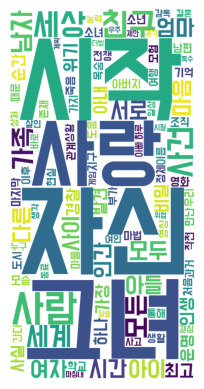

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc=WordCloud(width=400,
             height=800,  
             background_color='white', 
             font_path='./BMDOHYEON_ttf.ttf')
cloud=wc.generate_from_frequencies(dic)
plt.axis('off')
plt.imshow(cloud)

In [71]:
df.to_csv('감성분석.csv', index=False)

In [78]:
def word_cloud(name):
    idx = df[df['제목']==name].index[0]
    text = df['내용'][idx]

    total=[]
    
    # 의미없는 단어 제외
    drop_ = ['위해','이야기','해리','안나','선화','사라','한편','이제','과연','대한','점점','이자','다시']
    okt = Okt()
    for i in tqdm(okt.nouns(text)):
        # 한자리 제외
        if len(i)>1: 
            if i not in drop_ : total.append(i)

    result=Counter(total)

    dic={}
    # 100개 까지만 표시
    for a in tqdm(result.most_common(100)):
        dic[a[0]]=a[1]

    wc=WordCloud(width=400, height=800,
                 background_color='white', 
                 font_path='BMDOHYEON_ttf.ttf')
    cloud=wc.generate_from_frequencies(dic)
    plt.axis('off')
    plt.imshow(cloud)
    plt.savefig('cloud_image.jpg', dpi=95, bbox_inches='tight') 
    
    image1 = Image.open('screen.jpg')
    image2 = Image.open('cloud_image.jpg')
    image1.paste(image2, (107, 50)) 
    image1.save('result_image.jpg')  
    image1.close()
    image2.close()

극장전


100%|██████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<?, ?it/s]


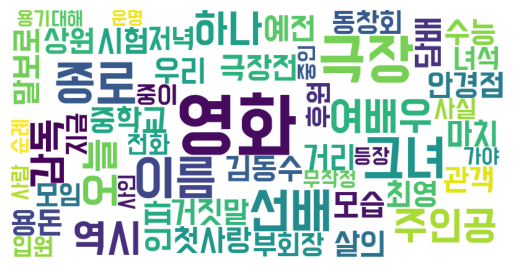

In [77]:
name = df['제목'][30]
print(name)
word_cloud(name)

In [65]:
import cv2
from PIL import Image

# 원본 이미지 로드
image1 = Image.open('screen.jpg')

# 겹칠 이미지 로드
image2 = Image.open('cloud_image.jpg')

# 두 번째 이미지를 첫 번째 이미지 위에 겹쳐붙이기
image1.paste(image2, (107, 50))  # (0, 0)은 겹쳐붙일 위치입니다.

# 새로운 이미지 저장
image1.save('result_image.jpg')  # 저장할 파일명

# 이미지 객체 닫기
image1.close()
image2.close()
